# GBM, LAT LLE and Swift Catalogs


Using **3ML's** catalog and data downloading tools, it is easy to build an analysis for either a single or multiple GRBs from start to finish. 

Here, we demostrate how we can search the catalogs for trigger information and then use this to perform analysis. Currently, Swift analysis is performed with the Generic **OGIPLike** or **XRTLike** plugin only and no data dowloaders are provided. In the future, a more capable Swift plugin can be included. 

In [1]:
%matplotlib inline
%matplotlib notebook

from astropy.time import Time

from threeML import *

get_available_plugins()

Configuration read from /Users/jburgess/.threeML/threeML_config.yml
Available plugins:

FermiGBMTTELike for Fermi GBM TTE (all detectors)
FermiLATLLELike for Fermi LAT LLE
OGIPLike for All OGIP-compliant instruments
EventListLike for Generic EventList data
SwiftXRTLike for Swift XRT
VERITASLike for VERITAS


## GBM catalog

The **3ML** GBM catalog allows you to search via cones on the sky, trigger names, T90s, date ranges and model parameters.

In [2]:
gbm_catalog = FermiGBMBurstCatalog()

### Searching cones on the sky

We can perform a cone search for a given Ra and Dec to see what GRBs are in this region of the sky.

In [3]:
gbm_catalog.cone_search(ra=0,dec=0,radius=10)

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermigbrst&


name,ra,dec,trigger_time,t90
,deg,deg,mjd,s
object,float64,float64,float64,float64
GRB080810549,356.800,0.320,54688.5487567,107.457
GRB090703329,0.770,9.680,55015.3291953,8.960
GRB100612726,352.000,-1.830,55359.7264598,8.576
GRB100924165,0.672,7.004,55463.1653740,9.024
GRB110729142,353.390,4.970,55771.1424297,408.582
GRB110921444,6.090,-5.830,55825.4436135,149.507
GRB111113410,4.320,-7.520,55878.4098583,15.360
GRB120624309,4.773,7.167,56102.3086266,0.640


Or perhaps we want to know the GRBs around the Crab nebula:

In [4]:
gbm_catalog.search_around_source('Crab',radius=5)

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermigbrst&


(83.63309062468973, 22.014494786634714, <Table masked=True length=4>
     name        ra     dec    trigger_time   t90   
                deg     deg        mjd         s    
    object    float64 float64    float64    float64 
 ------------ ------- ------- ------------- --------
 GRB090612619  81.030  17.710 54994.6186400   42.433
 GRB090907808  81.060  20.500 55081.8081884    0.832
 GRB100130777  78.570  20.830 55226.7767993   86.018
 GRB100915243  85.394  25.095 55454.2428196    7.936)

### Searching on T90 and time

Perhaps we want to analyze all short GRBs or GRBs in a specific date range.

First let's search on T90:

In [5]:
gbm_catalog.query("2<t90<10")

name,ra,dec,trigger_time,t90
object,float64,float64,float64,float64
GRB080714086,41.900,8.500,54661.0862506,5.376
GRB080715950,214.700,9.900,54662.9504649,7.872
GRB080806584,94.600,57.800,54684.5841575,2.304
GRB080808451,107.400,-33.800,54686.4514267,4.352
GRB080816989,289.500,-6.800,54694.9888274,4.608
GRB080817720,80.200,-17.100,54695.7202259,4.416
GRB080821332,238.600,32.600,54699.3315565,5.888
GRB080824909,122.400,-2.800,54702.9089668,7.424
GRB080828189,221.300,-12.300,54706.1890193,3.008


We can also search MJD or UTC. The GBM catalog uses MJD to index time. We can use astroy's time module to convert from UTC to MJD:

In [6]:
mjd = Time(['2010-01-01T00:00:00','2011-01-01T00:00:00']).mjd
gbm_catalog.query(' %f <trigger_time < %f' % tuple(mjd))

name,ra,dec,trigger_time,t90
object,float64,float64,float64,float64
GRB100101028,307.320,-27.000,55197.0276543,2.816
GRB100101988,70.660,18.690,55197.9876757,1.984
GRB100107074,6.310,-21.240,55203.0739799,0.576
GRB100111176,247.048,15.551,55207.1755752,19.52
GRB100112418,240.140,-75.100,55208.4175643,23.04
GRB100116897,305.020,14.450,55212.8965306,102.53
GRB100117879,11.260,-1.594,55213.8793943,0.256
GRB100118100,9.260,-37.370,55214.0996956,9.216
GRB100122616,79.200,-2.710,55218.6164041,22.529


## Searching on parameter space

We can also make selections on energy fluxes or model parameters.

GBM catalog fluxes depend on the model and the interval in which that model was fitted. 

In [7]:
gbm_catalog.query("pflx_band_alpha < -2./3. & pflx_band_ergflux > 1E-5")

name,ra,dec,trigger_time,t90
object,float64,float64,float64,float64
GRB090424592,189.500,16.800,54945.591767,14.144
GRB090618353,293.990,78.358,55000.3530863,112.386
GRB090902462,264.939,27.325,55076.4619018,19.328
GRB101014175,26.940,-51.070,55483.1749146,449.415
GRB110301214,229.350,29.400,55621.2143874,5.693
GRB110529034,118.330,67.910,55710.0338295,0.512
GRB110825102,44.896,15.407,55798.1019784,62.465
GRB111222619,179.193,69.036,55917.6193868,0.32
GRB120624309,4.773,7.167,56102.3086266,0.64


### Searching for triggers

We can also search for specific triggers

In [8]:
gbm_catalog.query_sources("GRB080916009",'GRB100204024')

name,ra,dec,trigger_time,t90
object,float64,float64,float64,float64
GRB080916009,119.800,-56.600,54725.0088613,62.977
GRB100204024,50.780,-47.890,55231.0235364,136.195


#### Let's look at what a search can give us:

The matching criteria can be used to extract information about the analysis as well as for setting up your own analysis.

For example, we can look at the duration information from each GRB in our last search:

In [9]:
gbm_catalog.result[['t90','t50']]

,t90,t50
name,,
GRB080916009,62.977,32.000
GRB100204024,136.195,21.504


To automate or repeat an analysis, it is good to know the values of source/background selections that were used in the catalog. These are extracted into a dictionary.

In [10]:
det_info = gbm_catalog.get_detector_information()

Let's examine what we have for GRB080916C.

We'll find the background selections and source (both peak and fluence) stored in a format readable by 3ML.

Additonally, we have the detectors used for catalog spectral analysis.

In [11]:
det_info['GRB080916009']

{'background': {'full': '-40.100000--6.250000,105.210000-146.350000',
  'post': '105.210000-146.350000',
  'pre': '-40.100000--6.250000'},
 'best fit model': {'fluence': 'sbpl', 'peak': 'comp'},
 'detectors': array(['n3', 'n4', 'b0'], 
       dtype='|S2'),
 'source': {'fluence': '1.280000-64.257000', 'peak': '2.048000-3.072000'},
 'trigger': 'bn080916009'}

## Downloading data

We can now get the data now and have a look ourselves. Using the information from the search, we can get the TTE and RSP files needed via the GBM data downloader.

In [12]:
gbm_data = download_GBM_trigger_data(trigger=det_info['GRB080916009']['trigger'],
                                      detectors=det_info['GRB080916009']['detectors'],
                                      destination_directory='gbm/bn080916009',
                                      compress_tte=True)


WARNING FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.



Compressing: glg_tte_n3_bn080916009_v01.fit
Compressing: glg_tte_n4_bn080916009_v01.fit
Compressing: glg_tte_b0_bn080916009_v01.fit


We now have our data locally downloaded from the HEASARC servers. This gets the most current version of the files and prefers RSP2 to RSP. You can of course use other methods to obtain earlier versions or differnt DRM types.

We can see where they are stored:

In [13]:
gbm_data

{'b0': {'rsp': '/Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_cspec_b0_bn080916009_v00.rsp2',
  'tte': '/Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_tte_b0_bn080916009_v01.fit.gz'},
 'n3': {'rsp': '/Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_cspec_n3_bn080916009_v00.rsp2',
  'tte': '/Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_tte_n3_bn080916009_v01.fit.gz'},
 'n4': {'rsp': '/Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_cspec_n4_bn080916009_v00.rsp2',
  'tte': '/Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_tte_n4_bn080916009_v01.fit.gz'}}

If the data already exist in that location, the downloader will skip them.

## Making an analysis

Now we have everything we need to make an analysis. We just need to create our plugins and set our models.

### Getting a model from the selection

3ML's GBM catalog will build a model for you from the HEASARC values. We simply choose the model and interval we want, i.e., Band, Comt, PL, SBPL and either peak or fluence interval.


Here we will use the best fit model (SBPL) for the fluence interval.

In [14]:
interval = 'fluence'

models = gbm_catalog.get_model(model=det_info['GRB080916009']['best fit model'][interval],interval=interval)

In [15]:
models['GRB080916009']

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (5):
--------------------

                                 value min_value max_value             unit
GRB080916009...K             0.0122397         0      None  1 / (cm2 keV s)
GRB080916009...alpha          -1.13938      -1.5         2                 
GRB080916009...break_energy    301.647        10      None              keV
GRB080916009...break_scale         0.3         0        10                 
GRB080916009...beta           -2.08541        -5      -1.6                 

Fixed parameters (3):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

### 3ML Analysis

#### Plugin setup

Let's build some plugins

In [16]:
det = 'n3'

nai3 = FermiGBMTTELike(name=det,
                       source_intervals=det_info['GRB080916009']['source']['fluence'],
                       background_selections=det_info['GRB080916009']['background']['full'],
                       tte_file=gbm_data[det]['tte'],
                       rsp_file=gbm_data[det]['rsp'])

det = 'n4'

nai4 = FermiGBMTTELike(name=det,
                       source_intervals=det_info['GRB080916009']['source']['fluence'],
                       background_selections=det_info['GRB080916009']['background']['full'],
                       tte_file=gbm_data[det]['tte'],
                       rsp_file=gbm_data[det]['rsp'])

det = 'b0'

bgo0 = FermiGBMTTELike(name=det,
                       source_intervals=det_info['GRB080916009']['source']['fluence'],
                       background_selections=det_info['GRB080916009']['background']['full'],
                       tte_file=gbm_data[det]['tte'],
                       rsp_file=gbm_data[det]['rsp'])


nai3.set_active_measurements('8-900')
nai4.set_active_measurements('8-900')
bgo0.set_active_measurements('250-42000')

Auto-determined polynomial order: 0


Unbinned 0-order polynomial fit with the Nelder-Mead method


Auto-probed noise models:
- observation: poisson
- background: gaussian



WARNING UserWarning: No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming TLMIN=1


WARNING VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future



Auto-determined polynomial order: 0


Unbinned 0-order polynomial fit with the Nelder-Mead method


Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-determined polynomial order: 1


Unbinned 1-order polynomial fit with the Nelder-Mead method


Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 8-900 translates to channels 4-124
Now using 121 channels out of 128
Range 8-900 translates to channels 3-123
Now using 121 channels out of 128
Range 250-42000 translates to channels 1-125
Now using 125 channels out of 128


<IPython.core.display.Javascript object>


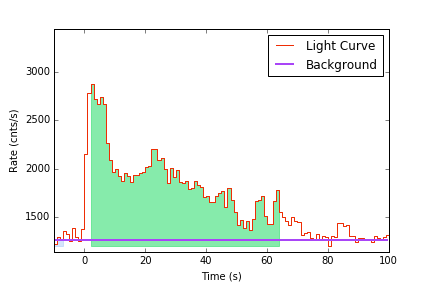

In [17]:
nai3.view_lightcurve(stop=100)

#### Model setup

We can use the model from the catalog and combine with the data into a JointLikelihood.

In [18]:

data_list = DataList(nai3,nai4,bgo0)

jl = JointLikelihood(models['GRB080916009'], data_list=data_list)

# Now we can fit

res = jl.fit()

Best fit values:



,Best fit value,Unit
GRB080916009...K,0.01449 +/- 0.00021,1 / (cm2 keV s)
GRB080916009...alpha,-1.098 +/- 0.015,
GRB080916009...beta,-1.94 +/- 0.05,
GRB080916009...break_energy,173 +/- 13,keV
GRB080916009...break_scale,0.11 +/- 0.05,



NOTE: errors on parameters are approximate. Use get_errors().


Correlation matrix:



1.00,0.73,-0.53,0.01,0.10
0.73,1.00,-0.38,0.17,0.02
-0.53,-0.38,1.00,0.56,-0.79
0.01,0.17,0.56,1.00,-0.51
0.10,0.02,-0.79,-0.51,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,3225.242354
n3,1063.535945
n4,1046.657339
b0,1115.049070


<IPython.core.display.Javascript object>


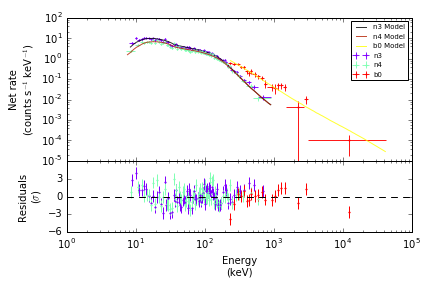

In [19]:
_ = display_ogip_model_counts(jl,min_rate=5,step=False)

## LLE Catalog

### Searching
Similar to the GBM catalog, we can search LAT LLE triggers with the LLE catalog:


In [20]:
lle_catalog = FermiLLEBurstCatalog()

We can perform cone, time, and trigger searches just like as with the GBM catalog. Currently, no T90 searches are available.

In [42]:
lle_catalog.cone_search(0,0,30)

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermille&


name,ra,dec,trigger_time,trigger_type
,deg,deg,mjd,
object,float64,float64,float64,object
GRB131231198,10.110,-2.420,56657.1981028,GRB
SFLARE140225029,337.908,-9.260,56713.0287958,SFLARE
GRB150510139,16.160,4.790,57152.1388164,GRB


In [22]:
lle_catalog.query_sources('GRB080916009')

name,ra,dec,trigger_time,trigger_type
object,float64,float64,float64,str3
GRB080916009,119.800,-56.600,54725.0088613,GRB


In [23]:
lle_catalog.result.loc['GRB080916009']['trigger_name']

'bn080916009'

## Downloading LLE data

With the 3ML LLE plugin, we no longer need PHA files. Therefore, the 3ML LLE downloader will get the LLE event file and associated LLE RSP (if it exists) as well as the FT2 file.

In [24]:
lle_data_info = download_LLE_trigger_data(lle_catalog.result.loc['GRB080916009']['trigger_name'],destination_directory='lat')

In [25]:
lle_data_info

{'ft2': '/Users/jburgess/coding/3ML/examples/lat/gll_pt_bn080916009_v10.fit',
 'lle': '/Users/jburgess/coding/3ML/examples/lat/gll_lle_bn080916009_v10.fit',
 'rsp': '/Users/jburgess/coding/3ML/examples/lat/gll_cspec_bn080916009_v10.rsp'}

## Analysis with GBM and LLE data

Analyze the LLE data you have just downloaded along with GBM data

In [26]:
lle = FermiLATLLELike('LLE',
                      lle_file=lle_data_info['lle'],
                      rsp_file=lle_data_info['rsp'],
                      ft2_file=lle_data_info['ft2'],
                      background_selections=det_info['GRB080916009']['background']['full'],
                      source_intervals=det_info['GRB080916009']['source']['fluence']
                     )

Auto-determined polynomial order: 1


Binned 1-order polynomial fit with the Powell method


Auto-probed noise models:
- observation: poisson
- background: gaussian


<IPython.core.display.Javascript object>


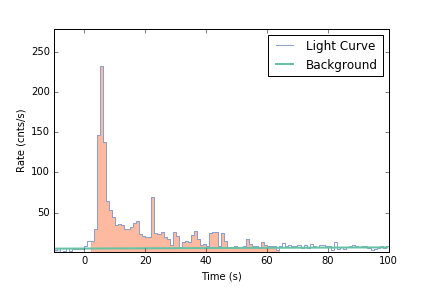

Range 50000-100000 translates to channels 11-16
Now using 6 channels out of 50


In [27]:
lle.view_lightcurve(stop=100)

lle.set_active_measurements('50000-100000')

In [28]:
data_list = DataList(nai3,nai4,bgo0,lle)

jl = JointLikelihood(models['GRB080916009'], data_list=data_list)

# Now we can fit

res = jl.fit()


WARNING RuntimeWarning: External parameter cons_n3 already exist in the model. Overwriting it...


WARNING RuntimeWarning: External parameter cons_n4 already exist in the model. Overwriting it...


WARNING RuntimeWarning: External parameter cons_b0 already exist in the model. Overwriting it...



Best fit values:



,Best fit value,Unit
GRB080916009...K,0.01438 +/- 0.00020,1 / (cm2 keV s)
GRB080916009...alpha,-1.098 +/- 0.017,
GRB080916009...beta,-2.140 +/- 0.018,
GRB080916009...break_energy,218 +/- 16,keV
GRB080916009...break_scale,0.21 +/- 0.06,



NOTE: errors on parameters are approximate. Use get_errors().


Correlation matrix:



1.00,0.65,-0.67,-0.13,0.30
0.65,1.00,-0.31,0.35,-0.04
-0.67,-0.31,1.00,0.64,-0.78
-0.13,0.35,0.64,1.00,-0.67
0.30,-0.04,-0.78,-0.67,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,3261.338531
n3,1064.142117
n4,1047.061227
b0,1117.372724
LLE,32.762462


<IPython.core.display.Javascript object>


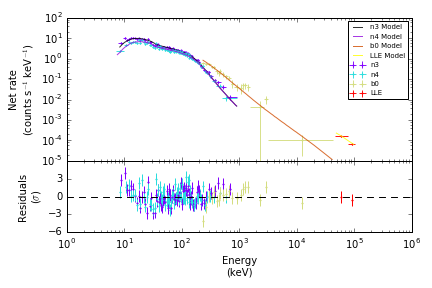

In [29]:
_ = display_ogip_model_counts(jl,min_rate=5,step=False)

## Swift Catalog

We can also examine the Swift GRB catalog. In the spirit of **3ML**, it is linked to other instruments so that we can know which triggers were seen by multiple missions.


In [30]:
swift_catalog = SwiftGRBCatalog()

### Cone, time, T90, and trigger seraches

Just as before, we can search on cones, time ranges, and triggers. Thanks to the Swift team, we can immediately see if there were other detections:

In [31]:
swift_catalog.cone_search(0,0,10)

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=swiftgrb&


name,ra,dec,trigger_time,redshift,bat_t90,bat_detection,xrt_detection,xrt_flare,uvot_detection,radio_detection,opt_detection
,deg,deg,,,s,,,,,,
object,float64,float64,object,float64,float64,object,object,object,object,object,object
GRB 050922B,5.806,-5.605,2005-09-22T15:02:00.257060,--,156.2900,Y,Y,Y,N,N,N
GRB 070808,6.764,1.176,2007-08-08T18:28:00.545880,3.5000,58.4300,Y,Y,N,N,N,N
GRB 080702B,355.567,-5.514,2008-07-02T01:10:38.08,--,26.0600,Y,Y,N,N,U,N
GRB 080810,356.794,0.320,2008-08-10T13:10:12.287980,3.3510,107.6700,Y,Y,Y,Y,Y,Y
GRB 081105,3.952,3.470,2008-11-05T13:31:46.529000,--,11.2000,Y,Y,N,N,U,N
GRB 100115A,3.367,-0.826,2010-01-15T11:15:19,--,3.0000,Y,Y,N,N,U,Y
GRB 100924A,0.676,7.001,2010-09-24T03:58:08.897460,--,71.8600,Y,U,,U,U,Y


In [32]:
swift_catalog.query('"2005-09-22T15:02:00.257060" < trigger_time < "2005-10-22T15:02:00.257060"')

name,ra,dec,trigger_time,redshift,bat_t90,bat_detection,xrt_detection,xrt_flare,uvot_detection,radio_detection,opt_detection
object,float64,float64,str26,float64,float64,str1,str1,str1,str1,str1,str1
GRB 050922C,317.389,-8.758,2005-09-22T19:55:50.400700,2.1995,4.54,Y,Y,N,Y,Y,Y
GRB 050925,303.487,34.330,2005-09-25T09:04:33.628160,--,0.09,Y,N,,N,N,N
GRB 051001,350.953,-31.523,2005-10-01T11:11:36.241320,2.4296,190.63,Y,Y,N,N,U,N
GRB 051006,110.809,9.506,2005-10-06T20:30:33.255560,1.059,26.04,Y,Y,Y,N,N,P
GRB 051008,202.873,42.098,2005-10-08T16:33:21.316200,5.2,64.0,Y,Y,N,N,N,Y
GRB 051012,270.535,-52.783,2005-10-12T17:05:56.957000,--,24.0,Y,P,N,N,U,U
GRB 051016A,122.819,-18.298,2005-10-16T05:23:31.350440,--,21.0,Y,Y,N,N,N,N
GRB 051016B,132.116,13.656,2005-10-16T18:28:08.981460,0.9364,4.02,Y,Y,Y,Y,N,Y
GRB 051021A,29.152,9.068,2005-10-21T13:21:57,--,--,U,Y,N,N,N,Y


### Searching redshift (z) and other observations

Thanks to the detail in the Swift GRB catalog, we can easily find information out about other instruments.


#### Redshift
Let's first look at a reshift search. Want to know about really high-z GRBs?


In [33]:
swift_catalog.query('redshift > 7')

name,ra,dec,trigger_time,redshift,bat_t90,bat_detection,xrt_detection,xrt_flare,uvot_detection,radio_detection,opt_detection
object,float64,float64,str26,float64,float64,str1,str1,str1,str1,str1,str1
GRB 090423,148.889,18.149,2009-04-23T07:55:19.349660,8.23,9.77,Y,Y,Y,N,N,Y
GRB 090429B,210.667,32.171,2009-04-29T05:30:03.365540,9.4,5.61,Y,Y,Y,N,N,N
GRB 100205A,141.388,31.740,2010-02-05T04:18:43.074340,11.0,26.0,Y,Y,Y,N,U,N
GRB 120923A,303.795,6.221,2012-09-23T05:16:06,8.0,27.22,Y,Y,N,N,N,N


Great! Now lets get those redshifts and learn more:

In [34]:
swift_catalog.get_redshift()

,z,z err,z type,reference
name,,,,
GRB 090423,8.23,0.06,S,http://adsabs.harvard.edu/abs/2009Natur.461.1254T
GRB 090429B,9.40,NaN,PL,http://adsabs.harvard.edu/abs/2012ApJ...736....7C
GRB 100205A,11.00,0.00,PL,https://gcn.gsfc.nasa.gov/gcn3/10374.gcn3
GRB 120923A,8.00,NaN,PL,https://gcn.gsfc.nasa.gov/gcn3/13802.gcn3


We can even simply click on the links and pull up the reference when we call that column:

In [35]:
swift_catalog.get_redshift()['reference']

name
GRB 090423     http://adsabs.harvard.edu/abs/2009Natur.461.1254T
GRB 090429B    http://adsabs.harvard.edu/abs/2012ApJ...736....7C
GRB 100205A            https://gcn.gsfc.nasa.gov/gcn3/10374.gcn3
GRB 120923A            https://gcn.gsfc.nasa.gov/gcn3/13802.gcn3
Name: reference, dtype: object

#### Other observations

There are several instruments observing GRBs. We can see all the instruments that co-observe with Swift:

In [36]:
swift_catalog.other_observing_instruments

['Agile',
 'Agile-MCAL',
 'Agile-Mcal',
 'Chandra',
 'Fermi-GBM',
 'Fermi-LAT',
 'HETE',
 'Hershel',
 'IPN',
 'Integral',
 'Konus',
 'Konus-A',
 'Konus-RF',
 'Konus-Wind',
 'Konus-wind',
 'Mars Odyssey',
 'Maxi',
 'Maxi-GSC',
 'Messenger',
 'RHESSI',
 'ROSAT',
 'RXTE',
 'SuperAgile',
 'Suzaku',
 'Suzaku-WAM',
 'Suzaku-Wam',
 'XMM',
 'XMM-Newton']

Let's look at all those that are also seen by Integral and/or Chandra:

In [37]:
swift_catalog.query_other_observing_instruments('Integral','Chandra')

name,ra,dec,trigger_time,redshift,bat_t90,bat_detection,xrt_detection,xrt_flare,uvot_detection,radio_detection,opt_detection
object,float64,float64,str26,float64,float64,str1,str1,str1,str1,str1,str1
GRB 041218,24.782,71.342,2004-12-18T15:45:25,--,--,U,Y,N,U,N,Y
GRB 041219A,6.115,62.842,2004-12-19T01:42:18.000000,0.3,--,Y,U,,U,Y,Y
GRB 050223,271.385,-62.473,2005-02-23T03:09:06.068200,0.584,21.68,Y,Y,N,N,U,N
GRB 050412,181.105,-1.200,2005-04-12T05:44:02.894760,--,26.46,Y,Y,N,N,N,N
GRB 050502A,202.443,42.674,2005-05-02T02:13:57,3.793,--,U,N,,N,N,Y
GRB 050504,201.005,40.704,2005-05-04T08:00:52.5,--,--,U,Y,N,N,U,N
GRB 050509B,189.058,28.984,2005-05-09T04:00:19.237760,0.2249,0.02,Y,Y,N,N,N,N
GRB 050509C,193.225,-44.834,2005-05-09T22:45:54,--,--,U,N,,N,Y,Y
GRB 050520,192.525,30.451,2005-05-20T00:05:53,--,--,U,Y,N,N,N,N


We can then obtain the informatrion from all the observing instruments from this (or any other) search:

In [38]:
other_instruments = swift_catalog.get_other_instrument_information()
other_instruments

Agile                                Agile-MCAL  \
GRB 050709  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 100206A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 050626  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 050509C GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 050509B GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 081210  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 090817  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 091221  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 110604A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 090814B GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 091111  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 050525A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 120419A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 121102A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 061025  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
...                          ...                                       ...   
GRB 080319B GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 080319A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 080120  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 091202  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 080613B GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 080613A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 090129  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 081204  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 091208A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 080603B GCN              NaN                                       NaN   
            trigger number   NaN                 

Agile                                Agile-MCAL  \
GRB 050709  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 100206A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 050626  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 050509C GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 050509B GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 081210  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 090817  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 091221  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 110604A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 090814B GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 091111  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 050525A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 120419A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 121102A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 061025  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
...                          ...                                       ...   
GRB 080319B GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 080319A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 080120  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 091202  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 080613B GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 080613A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 090129  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 081204  GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 091208A GCN              NaN                                       NaN   
            trigger number   NaN                                       NaN   
GRB 080603B GCN              NaN                                       NaN   
            trigger number   NaN                 

In particular, for Fermi-GBM, we can view the trigger number. In the future, other instruments will have this feature

It is then very simple to use the GBM catalog and downloader to obtain the proper information and data to perform analysis with **3ML**

In [39]:
other_instruments['Fermi-GBM']

GRB 050709   GCN                                                     NaN
             trigger number                                          NaN
GRB 100206A  GCN               https://gcn.gsfc.nasa.gov/gcn3/10381.gcn3
             trigger number                                         None
GRB 050626   GCN                                                     NaN
             trigger number                                          NaN
GRB 050509C  GCN                                                     NaN
             trigger number                                          NaN
GRB 050509B  GCN                                                     NaN
             trigger number                                          NaN
GRB 081210   GCN                                                     NaN
             trigger number                                          NaN
GRB 090817   GCN                https://gcn.gsfc.nasa.gov/gcn3/9823.gcn3
             trigger number                        

#### Other observations

It is also possible to investigate optical, radio, etc. other observations and their references:

In [40]:
swift_catalog.get_other_observation_information()

bat  \
GRB 050709  GCN                                                     None   
            observed                                                   U   
            reference                                                NaN   
GRB 100206A GCN                                                      NaN   
            observed                                                   Y   
            reference          https://gcn.gsfc.nasa.gov/gcn3/10379.gcn3   
GRB 050626  GCN                                                     None   
            observed                                                   U   
GRB 050509C GCN                                                     None   
            observed                                                   U   
            reference                                                NaN   
GRB 050509B GCN                                                      NaN   
            observed                                                   Y   
            reference  http://adsabs.harvard.edu/abs/2011ApJS..195....2S   
GRB 081210  GCN                                                      NaN   
            observed                                                   Y   
            reference  http://adsabs.harvard.edu/abs/2011ApJS..195....2S   
GRB 090817  GCN                                                     None   
            observed                                                   U   
            reference                                                NaN   
GRB 091221  GCN                                                      NaN   
            observed                                                   Y   
            reference  http://adsabs.harvard.edu/abs/2011ApJS..195....2S   
GRB 110604A GCN                                                      NaN   
            observed                                                   Y   
            reference          https://gcn.gsfc.nasa.gov/gcn3/12063.gcn3   
GRB 090814B GCN                                                     None   
            observed                                                   U   
            reference                                                NaN   
GRB 091111  GCN                                                     None   
...                                                                  ...   
GRB 080613A GCN                                                     None   
            observed                                                   U   
            reference                                                NaN   
GRB 090129  GCN                                                      NaN   
            observed                                                   Y   
            reference  http://adsabs.harvard.edu/abs/2011ApJS..195....2S   
GRB 081204  GCN                                                     None   
            observed                                                   U   
            reference                                                NaN   
GRB 091208A GCN                                                      NaN   
            observed                                                   Y   
            reference  http://adsabs.harvard.edu/abs/2011ApJS..195....2S   
GRB 080603B GCN                                                      NaN   
            observed                                                   Y   
            reference  http://adsabs.harvard.edu/abs/2011ApJS..195....2S   
GRB 080603A GCN                                                     None   
            observed                                                   U   
            reference                                                NaN   
GRB 080605  GCN                                                      NaN   
            observed                                                   Y   
            reference  http://adsabs.harvard.edu/abs/2011ApJS..195....2S   
GRB 080607  GCN                          

## Clean up

If you want to tidy up and remove the data you just downloaded, simply use the cleanup functions provided:

In [41]:
cleanup_downloaded_GBM_data(gbm_data)

cleanup_downloaded_LLE_data(lle_data_info)

Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_cspec_b0_bn080916009_v00.rsp2
Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_tte_b0_bn080916009_v01.fit.gz
Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_cspec_n3_bn080916009_v00.rsp2
Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_tte_n3_bn080916009_v01.fit.gz
Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_cspec_n4_bn080916009_v00.rsp2
Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_tte_n4_bn080916009_v01.fit.gz


Removing: /Users/jburgess/coding/3ML/examples/lat/gll_pt_bn080916009_v10.fit
Removing: /Users/jburgess/coding/3ML/examples/lat/gll_cspec_bn080916009_v10.rsp
Removing: /Users/jburgess/coding/3ML/examples/lat/gll_lle_bn080916009_v10.fit


